In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
datos= pd.read_csv('./Mall_Customers.csv')

In [7]:
datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
print("cantidad de registros con cero en CustomerID:",datos['CustomerID'].isnull().sum())
print("cantidad de registros con cero en edad:",datos['Age'].isnull().sum())
print("cantidad de registros con cero en ingreso anual:",datos['Annual Income (k$)'].isnull().sum())
print("cantidad de registros con cero en indice de gasto:",datos['Spending Score (1-100)'].isnull().sum())

cantidad de registros con cero en CustomerID: 0
cantidad de registros con cero en edad: 0
cantidad de registros con cero en ingreso anual: 0
cantidad de registros con cero en indice de gasto: 0


In [11]:
datos.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [12]:
datos=datos[["CustomerID","Annual Income (k$)","Spending Score (1-100)"]]

In [13]:
datos.head(10)

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
5,6,17,76
6,7,18,6
7,8,18,94
8,9,19,3
9,10,19,72


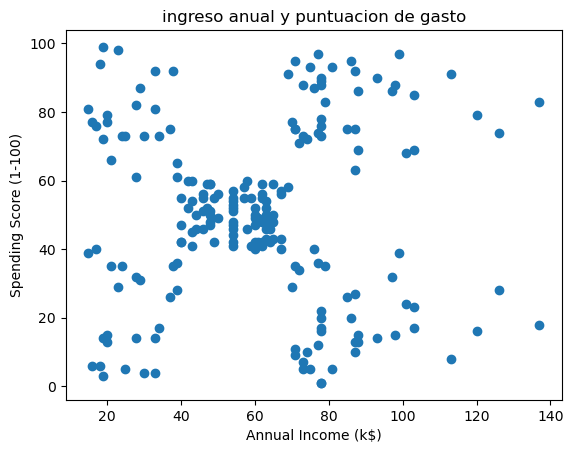

In [15]:
plt.scatter(datos['Annual Income (k$)'],datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('ingreso anual y puntuacion de gasto')
plt.show()

In [16]:
Nc=range(1, 8)
kmeans=[KMeans(n_clusters=i) dor i in Nc]
kmeans
score=[kmeans[i].fit(datos).score(datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Grafica de codo')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1881488899.py, line 2)

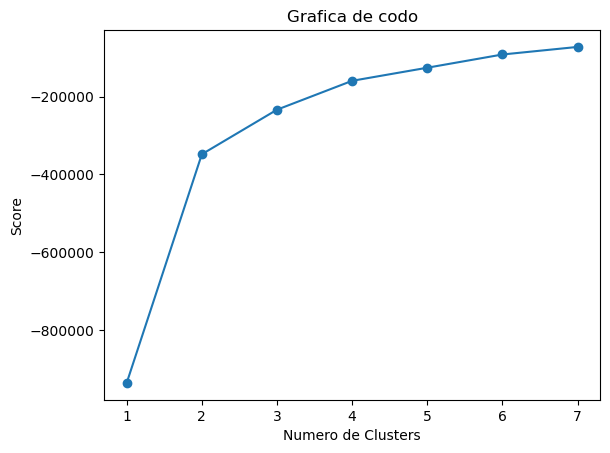

In [17]:
Nc=range(1, 8)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(datos).score(datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Grafica de codo')
plt.show()

In [18]:
Modelo=KMeans(n_clusters=5, random_state=0)
Modelo.fit(datos)

KMeans(n_clusters=5, random_state=0)

In [19]:

modelo.labels_
datos["Grupo"]=Modelo.labels_
print (datos)

NameError: name 'modelo' is not defined

In [21]:

Modelo.labels_
datos["Age"]=Modelo.labels_
print (datos)

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Age
0             1                  15                      39    3
1             2                  15                      81    1
2             3                  16                       6    3
3             4                  16                      77    1
4             5                  17                      40    3
..          ...                 ...                     ...  ...
195         196                 120                      79    2
196         197                 126                      28    4
197         198                 126                      74    2
198         199                 137                      18    4
199         200                 137                      83    2

[200 rows x 4 columns]


In [32]:
observaciones=len(datos)
x=datos.drop('Age', axis=1)
clusters= datos['Age']

sil_score = silhouette_score(X, clusters)
calinski_score =calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data =[
["Numero de Observaciones", observaciones],
["coeficiente Silhouette", sil_score],
["Indice Calinski Harabanz", calinski_score],
["Indice Davies Bouldin", davies_score]]

from tabulate import tabulate
print(tabulate(table_data, headers=["Metric","Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  coeficiente Silhouette  | 0.49056816409933873 |
| Indice Calinski Harabanz |  350.3566749714125  |
|  Indice Davies Bouldin   | 0.7489084383884042  |
+--------------------------+---------------------+


In [33]:
observaciones=len(datos)
x=datos.drop('Age', axis=1)
clusters= datos['Age']

sil_score = silhouette_score(X, clusters)
calinski_score =calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data =[
["Numero de Observaciones", observaciones],
["coeficiente Silhouette", sil_score],
["Indice Calinski Harabanz", calinski_score],
["Indice Davies Bouldin", davies_score]]

from tabulate import tabulate
print(tabulate(table_data, headers=["Metric","Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  coeficiente Silhouette  | 0.49056816409933873 |
| Indice Calinski Harabanz |  350.3566749714125  |
|  Indice Davies Bouldin   | 0.7489084383884042  |
+--------------------------+---------------------+


In [3]:
plt.scatter(datos['Annual Income (k$)'], datos['CustomerID'], c=datos['Age'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clientes')
plt.show()

NameError: name 'plt' is not defined

In [5]:
Grafica_3D= px.scatter_3d(datos, x='Annual Income (k$)',y='Spending Score (1-100)', z='CustomerID', color='Age', symbol='Age', symbol_map={0: 'circle', 1:'circle', 2:'circle',3:'circle',4:'circle'})
Grafica_3D.update.layput(showlegend=False)

NameError: name 'px' is not defined

In [6]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

NameError: name 'X' is not defined